In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2023W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**. 

Imports
------

In [1]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

## Instructions
rubric={points}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/master/docs/homework_instructions.md). 

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

**Important**: In this assignment we are using autograder so that you can get feedback on your solutions. For the autograder to work, you need to install `otter` in the course environment as follows. 

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. Once you are done with the assignment follow the instructions below before the submission. 

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/123439). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
4. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

_Points:_ 3

<!-- END QUESTION -->

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 

<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data
rubric={autograde}

**Your tasks:**

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

> Make sure you have put the data CSV as `spotify.csv` under the data directory (data/spotify.csv). When you read the data file, use this relative path for the autograder to work properly on Gradescope. 

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [2]:
spotify_df = None

# BEGIN SOLUTION

spotify_df = pd.read_csv("data/spotify.csv", index_col=0)
spotify_df.head()

# END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [ ]:
grader.check("q1.1")

<br><br>

### 1.2 Number of training and test examples
rubric={autograde}

**Your tasks:**

Run the following line of code to split the data. How many training and test examples do we have? Store them in variables `n_train_samples` and `n_test_samples`, respectively.  

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [5]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [6]:
# Please provide numeric values
n_train_samples = None
n_test_samples = None

# BEGIN SOLUTION
train_df.shape
# END SOLUTION

(1613, 16)

In [7]:
# BEGIN SOLUTION
test_df.shape
# END SOLUTION

(404, 16)

In [8]:
# BEGIN SOLUTION
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]
# END SOLUTION

In [ ]:
grader.check("q1.2")

<br><br>

#### 1.3 `describe()` method
rubric={autograde}

**Your tasks:**
1. Store the output of describe() on the training split in spotify_summary variable below and display the summary statistics. By default, this function will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? Store the feature name as a string in the `smallest_range_feature` variable below.

> Hint: You can subtract the min value from the max value of the column to get the range.

> Note that `describe` returns another DataFrame.

<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 3

In [10]:
spotify_summary = None

# BEGIN SOLUTION
spotify_summary = train_df.describe()
spotify_summary
# END SOLUTION

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [11]:
smallest_range_feature = None

# BEGIN SOLUTION
smallest_range_feature = "speechiness" 
(spotify_summary.loc["max"] - spotify_summary.loc["min"]).sort_values()
# END SOLUTION

speechiness              0.598900
danceability             0.836000
valence                  0.936700
liveness                 0.950200
instrumentalness         0.976000
energy                   0.981400
acousticness             0.993997
mode                     1.000000
target                   1.000000
time_signature           4.000000
key                     11.000000
loudness                30.364000
tempo                  171.472000
duration_ms         988585.000000
dtype: float64

In [ ]:
grader.check("q1.3")

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 
rubric={points}

The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

> Note: I am using pandas plotting here. You can also use matplotlib if you wish. 

**Your tasks:**

Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence

> To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 5

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms
rubric={points}

**Your tasks:**

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class? Briefly explain your answer. 

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

No, the feature might still be useful, because it may be predictive in conjunction with other features. For example, the valence feature histograms (above) do indeed look quite overlapping. But it may be the case that very high valence in conjunction with low tempo is very predictive of a liked song. This type of pattern would not emerge in these individual histograms, but a decision tree could potentially still learn it.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 
rubric={reasoning}

Note that the dataset includes two text features labeled `song_title` and `artist`.

**Your tasks:**

1. Do you think these features could be useful in predicting whether the user liked the song or not? Why or why not? 
2. Would there be any difficulty in using these features, in the form they are, in your model? Briefly explain.    

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

The `song_title` and `artist` features can definitely be useful in predicting whether the user liked the song or not. For example, the user can have a strong preference for an artist or for particular kinds of songs. That said, free text columns are a bit tricky to use directly in your `X`; they need to be encoded in numbers so that we can use them in machine learning models. These columns could also be considered as categorical columns rather than free text columns, but too many unique categories might be a problem. One way to deal with this could be first categorizing them into more coarse-grained categories, and then treating them as categorical variables. 

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1 Separating `X` and `y`
rubric={autograde}

**Your tasks:**

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Drop the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [16]:
X_train = None
y_train = None
X_test = None
y_test = None

# BEGIN SOLUTION
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

# END SOLUTION

In [ ]:
grader.check("q2.1")

<br><br>

### 2.2 Training a baseline model `DummyClassifier`
rubric={autograde:2}

**Your tasks:**
1. Train a baseline model. In particular, carry out 10-fold cross-validation using `DummyClassifier` with `random_state=123`. Store the mean cross-validation score in the `dummy_score` variable below. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [18]:
dummy_score = None
# BEGIN SOLUTION
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(random_state=123)
dummy_score = cross_val_score(dummy, X_train, y_train, cv=10).mean()
dummy_score
# END SOLUTION

0.5120887968714055

In [ ]:
grader.check("q2.2")

<br><br>

### 2.3 Training a decision tree mode with default hyperparameters 
rubric={autograde}

**Your tasks:**

1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [20]:
spotify_tree = None

# BEGIN SOLUTION
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)
# END SOLUTION

DecisionTreeClassifier(random_state=123)

In [ ]:
grader.check("q2.3")

<br><br>

### 2.4 Predicting using the trained model
rubric={autograde}

**Your tasks**

1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 2

In [22]:
pred = None

# BEGIN SOLUTION
pred = spotify_tree.predict(X_train.iloc[[0]])[0]
pred == y_train.iloc[0]
# END SOLUTION

True

In [ ]:
grader.check("q2.4")

<br><br>

### 2.5 `cross_val_score`
rubric={autograde}

**Your tasks:**

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 2

In [24]:
mean_cv_score = None

# BEGIN SOLUTION
mean_cv_score = cross_val_score(spotify_tree, X_train, y_train, cv=10).mean()
# END SOLUTION

In [ ]:
grader.check("q2.5")

<br><br>

### 2.6 `cross_validate`
rubric={autograde}

The above is useful, but we would like to see the training accuracy as well. 

**Your tasks:**

1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 3

In [26]:
scores_df = None

# BEGIN SOLUTION
scores = cross_validate(spotify_tree, X_train, y_train, cv=10, return_train_score=True)
scores_df = pd.DataFrame.from_dict(scores)
scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.011015,0.000876,0.685185,0.999311
1,0.010886,0.000676,0.635802,0.998622
2,0.010239,0.000587,0.641975,0.999311
3,0.010516,0.000689,0.708075,0.998623
4,0.010509,0.000636,0.726708,0.998623
5,0.010381,0.000563,0.608696,0.998623
6,0.009113,0.000558,0.714286,0.998623
7,0.009553,0.000575,0.714286,0.999311
8,0.009689,0.000562,0.677019,0.999311
9,0.010136,0.000565,0.708075,0.998623


In [ ]:
grader.check("q2.6")

<br><br>

<!-- BEGIN QUESTION -->

### 2.7 Examining subs-cores
rubric={points}

**Your tasks:**
1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly explain in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.7
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [30]:
# BEGIN SOLUTION
scores_df
# END SOLUTION

,fit_time,score_time,test_score,train_score
0,0.011015,0.000876,0.685185,0.999311
1,0.010886,0.000676,0.635802,0.998622
2,0.010239,0.000587,0.641975,0.999311
3,0.010516,0.000689,0.708075,0.998623
4,0.010509,0.000636,0.726708,0.998623
5,0.010381,0.000563,0.608696,0.998623
6,0.009113,0.000558,0.714286,0.998623
7,0.009553,0.000575,0.714286,0.999311
8,0.009689,0.000562,0.677019,0.999311
9,0.010136,0.000565,0.708075,0.998623


In [31]:
# BEGIN SOLUTION
scores_df.mean()
# END SOLUTION

fit_time       0.010204
score_time     0.000629
test_score     0.682011
train_score    0.998898
dtype: float64

Looks like there is quite a bit of variation in accuracies in different folds. The cv scores range from 0.60 to 0.72, so the range is fairly large. I would say I don't trust the 0.69 that much, certainly not to three or even two decimal places. I might say "around 0.60-0.70" or something like that.

The training accuracy is much higher than the cross-validation accuracy suggesting that the model is overfit on the training data.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1 Train and validation plots
rubric={autograde}


**Your tasks:**

1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with the following values of `max_depth`: `np.arange(1, 25, 2)`. Set the `random_state` of `DecisionTreeClassifier` to 123 in each case for reproducibility. 
2. For each `max_depth`, get both the mean train accuracy and the mean cross-validation accuracy. Store your results in the `results_df` dataframe.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation accuracies on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which and make sure each curve and the axes have the reasonable name. Save the plot to `max_depth_plot`.

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [32]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 2

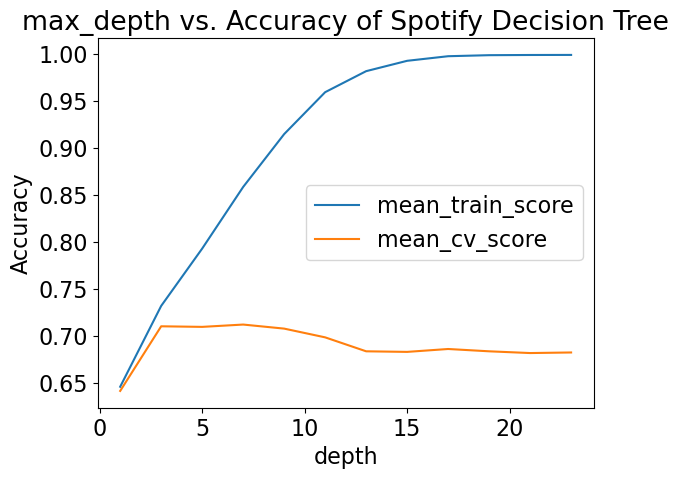

In [33]:
# max_depth_plot: the figure plotted for this exercise
max_depth_plot = None
results_df = None

# BEGIN SOLUTION
results_dict = {
    "depth": [],
    "mean_train_score": [],
    "mean_cv_score": [],
}
param_grid = {"max_depth": np.arange(1, 25, 2)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
max_depth_plot = results_df[["mean_train_score", "mean_cv_score"]].plot(title = "max_depth vs. Accuracy of Spotify Decision Tree", ylabel = "Accuracy")

# END SOLUTION

In [ ]:
grader.check("q3.1")

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Visual review of plot
rubric={manual}

**Ensure your plot `max_depth_plot` includes the following:**
1. Both the train accuracy and the cross-validation accuracy are included in the plot.
2. The provided `max_depth` values are used.
3. The x-axis and y-axis have reasonable names.
4. The data points are correct.

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 8

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3.3 `max_depth` and the fundamental tradeoff
rubric={points}

**Your tasks:**

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In case of the training data, a higher value of `max_depth` parameter results in higher accuracy. For `max_depth >= 15` the accuracy is 1.0, which means that the model is able to classify all training examples perfectly. This happens because for higher `max_depth` values, the decision tree learns a specific rule for almost all examples in the training data. In case of the cross-validation scores, initially the accuracy increases a bit and then it goes back down. 

<!-- END QUESTION -->

<br><br>

### 3.4 Picking a reasonable value for `max_depth`
rubric={autograde}

**Your tasks:**

From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 2

In [38]:
best_max_depth = None

# BEGIN SOLUTION
best_max_depth = results_df.index.values[np.argmax(results_df["mean_cv_score"])]
print("The maximum validation accuracy is %0.3f at best max_depth = %d "% (np.max(results_df["mean_cv_score"]),best_max_depth))
# END SOLUTION

The maximum validation accuracy is 0.712 at best max_depth = 7 


In [ ]:
grader.check("q3.4")

<br><br>

### 3.5 Final assessment on the test set
rubric={autograde}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

**Your tasks:**

1. Create a decision tree model `best_model` using the `best_max_depth` you chose in the previous exercise. 
2. Fit the `best_model` on the _entire training set_ (`X_train` and `y_train`). 
2. Compute the test score (on `X_test` and `y_test`) and store it in a variable called `test_score` below.

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 3

In [41]:
best_model = None
test_score = None

# BEGIN SOLUTION
model = DecisionTreeClassifier(max_depth=best_max_depth)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)
# END SOLUTION

In [ ]:
grader.check("q3.5")

<br><br>

<!-- BEGIN QUESTION -->

### 3.6 Analysis
rubric={points}

**Your tasks:**

1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the `max_depth` you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.6
    
</div>

_Points:_ 5

_Type your answer here, replacing this text._

We see the test score is a bit higher compared to the cross-validation score. But I would not trust this result too much. Looking at the plot, we can see the cv score plot is quite "bumpy" and even if `max_depth=5` is a pretty good value, there is probably also some luck involved there.

If we are to pick `max_depth` simply based on the training data, it'll pick the lowest value for the parameter as it performs best on the training set. (See the table and plot in 5.1.) That said, that model would be overfit and it won't generalize well on the validation data. That's why we treat it as a hyperparameter and pick the best value based on the cross-validation accuracy. 

Whether the chosen `max_depth` generalizes to other users or not would depend upon how similar the new user is to this user. In other words, whether the training data for this user is representative of the new user or not. That said, the chosen `max_depth` of 5 would most like do better than if we had chosen a higher depth.  

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions
rubric={points}

Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

1. Less than $5.5$ give us the first 3 examples. We'd predict $-1$ in this "true" case. For the last 3 examples, we'd predict $+1$.
2. The accuracy would be 5/6.
3. No, it's not possible. For the first column, we have $+1$ labels with feature values smaller and larger than 5, so if we correctly classify the first example then we incorrectly classify something else. For the second column, we have $+1$ labels for feature values smaller and larger than $2$, so if we correctly classify the first example then we incorrectly classify something else. 

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Congratulations on working with your first machine learning model! Well done 👏👏!

![](img/eva-well-done.png)